### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [250]:
data = pd.read_csv(r'C:\Users\pbthakke\Documents\Learning\Machine Learning\assignment_5_1_starter\data\coupons.csv')

In [9]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [26]:
pd.set_option('display.max_columns', None)
data.head(20)
# time and expiration columns are non numeric and difficult to work with



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [27]:
# Missing data
null = data.isnull().sum()
print(null)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [174]:
# The car column isn't really useful as it is mostly empty
# The other columns with missing data have very little missing data.  
# These rows could be dropped with little impact on the analysis.  We will lose less than 10% of the data.
# However, I will keep all the data.
# I will convert the time into a 24 hour clock, so that they get ordered correctly

data['time'] = data['time'].str.replace('6PM','1800')
data['time'] = data['time'].str.replace('7AM','700')
data['time'] = data['time'].str.replace('10AM','1000')
data['time'] = data['time'].str.replace('2PM','1400')
data['time'] = data['time'].str.replace('10PM','2200')
data['time'].value_counts()

1800    3230
700     3164
1000    2275
1400    2009
2200    2006
Name: time, dtype: int64

In [37]:
data['expiration'].value_counts()
# Since expiration only has two values, I will leave it as it is.

1d    7091
2h    5593
Name: expiration, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [38]:
data['Y'].value_counts()
# 7210 accepted and 5474 did not accept, or 56.8%

1    7210
0    5474
Name: Y, dtype: int64

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Business')

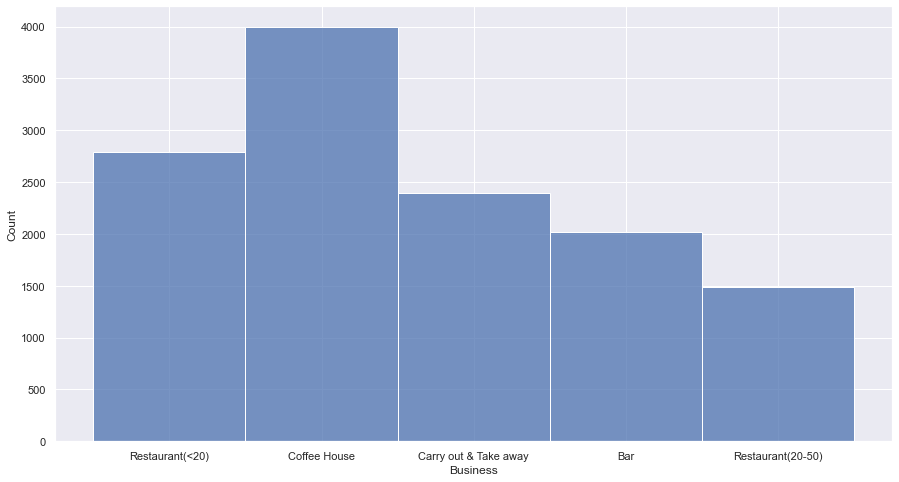

In [23]:
p = sns.histplot(data = data, x='coupon')
sns.set(rc = {'figure.figsize':(25,8)})
p.set_xlabel('Business')


6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature')

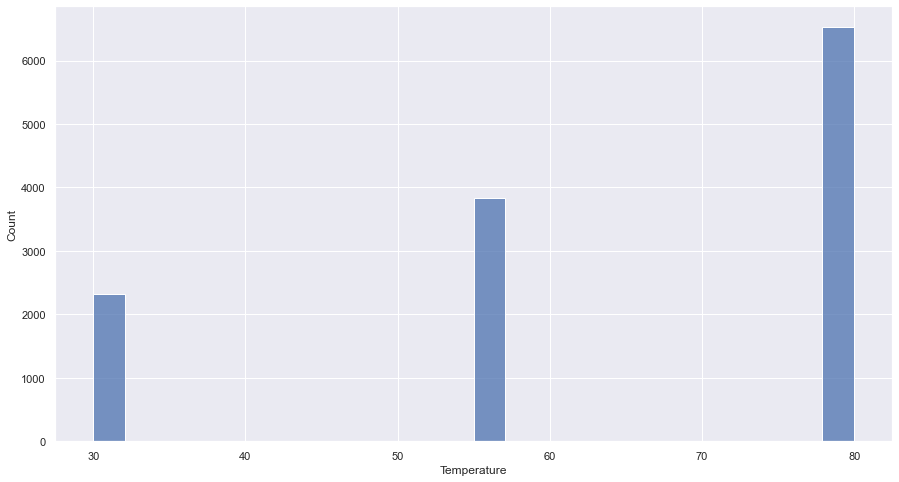

In [29]:
p = sns.histplot(data = data, x='temperature')
sns.set(rc = {'figure.figsize':(15,8)})
p.set_xlabel('Temperature')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [57]:
barcoupons = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [31]:
barcoupons['Y'].value_counts()
# 1190 were accepted and 827 were not accepted, or 59%

0    1190
1     827
Name: Y, dtype: int64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [69]:
barcoupons['Bar'].value_counts()
barcoupons.loc[(barcoupons['Bar'] == 'never') | (barcoupons['Bar'] == 'less1') | (barcoupons['Bar'] == '1~3'), 'Bar'] = 0 
barcoupons.loc[(barcoupons['Bar'] == '4~8') | (barcoupons['Bar'] == 'gt8'), 'Bar'] = 1 
barcoupons['Bar'].value_counts()
barcoupons.groupby('Bar').sum()['Y']
# 666/1190 people accepted who go to a bar 3 or less times, or 56%
# 153/827 people accepted who go to a bar more than 3 times, or 19%

Bar
0    666
1    153
Name: Y, dtype: int64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [108]:
data = pd.read_csv(r'C:\Users\pbthakke\Documents\Learning\Machine Learning\assignment_5_1_starter\data\coupons.csv')
barcoupons = data[data['coupon'] == 'Bar']

In [110]:
barcoupons.loc[(barcoupons['Bar'] == 'never') | (barcoupons['Bar'] == 'less1') , 'Bar'] = 0 
barcoupons.loc[(barcoupons['Bar'] == '1~3') | (barcoupons['Bar'] == '4~8') | (barcoupons['Bar'] == 'gt8'), 'Bar'] = 1 
barcoupons['Bar'].value_counts()



0    1400
1     596
Name: Bar, dtype: int64

In [111]:
# Need to clean up the data so it is all numeric.  Set 50plus to 50 and below21 to 21
barcoupons.loc[barcoupons['age']=='50plus'] = 50
barcoupons.loc[barcoupons['age']=='below21'] = 21
barcoupons['age'].astype(int).value_counts()



21    504
26    395
31    339
50    283
36    209
41    178
46    109
Name: age, dtype: int64

In [112]:
barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['age'].astype(int) >  25)].count()['Y']

353

In [117]:
barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['age'].astype(int) >25)].sum()['Y']
# 247 people out of 353 accepted, or 70%
# This compares with 57% of the general population
# (7210 - 247) = 6963 out of (12684 - 353) = 12331 of everyone elase accepted, or 56.5%

C:\Users\pbthakke\AppData\Local\Temp/ipykernel_57624/229373012.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['age'].astype(int) >25)].sum()['Y']


247

5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

In [ ]:
# Maybe, the people over 25 who go to bars are more crunched for money because they have families and are more susceptible to coupons

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [126]:
barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['age'].astype(int) >  25)].sum()['has_children']

C:\Users\pbthakke\AppData\Local\Temp/ipykernel_57624/1842082967.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['age'].astype(int) >  25)].sum()['has_children']


128

In [124]:
barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['age'].astype(int) >25) & (barcoupons['Y'] ==1)].sum()['has_children']

# 84 out of 128 of the bar goers who had children over 25 accepted the coupons, or 65%
# While this is higher than normal, it is not has high as those that do not have children, so the hypothesis is false

C:\Users\pbthakke\AppData\Local\Temp/ipykernel_57624/727005109.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['age'].astype(int) >25) & (barcoupons['Y'] ==1)].sum()['has_children']


84

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [135]:
barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['passanger'] != 'Kid(s)') & (barcoupons['occupation'] != 'Farming Fishing & Forestry')].sum()['Y']


C:\Users\pbthakke\AppData\Local\Temp/ipykernel_57624/3139109209.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['passanger'] != 'Kid(s)') & (barcoupons['occupation'] != 'Farming Fishing & Forestry')].sum()['Y']


349

In [136]:
barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['passanger'] != 'Kid(s)') & (barcoupons['occupation'] != 'Farming Fishing & Forestry')].count()['Y']
# 349 out of 485 (72%) people who go to bars more than once a monnth and have passengers that are kids and occupations that are not Farming, Fishing, and Forestry accepted
# This is the highest rate of acceptance seen so far.

485

8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [141]:
barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['passanger'] != 'Kid(s)') & (barcoupons['maritalStatus'] != 'Widowed')].sum()['Y']

C:\Users\pbthakke\AppData\Local\Temp/ipykernel_57624/1077410765.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['passanger'] != 'Kid(s)') & (barcoupons['maritalStatus'] != 'Widowed')].sum()['Y']


349

In [149]:
barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['passanger'] != 'Kid(s)') & (barcoupons['maritalStatus'] != 'Widowed')].count()['Y']
#349 out of 485 or 72%.  This is much greater that the value for the entire dataset (57%)

485

In [143]:
barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['age'].astype(int) < 30)].sum()['Y']

C:\Users\pbthakke\AppData\Local\Temp/ipykernel_57624/4090532401.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['age'].astype(int) < 30)].sum()['Y']


245

In [150]:
barcoupons[(barcoupons['Bar'] == 1) & (barcoupons['age'].astype(int) < 30)].count()['Y']
245 out of 335 or 73%.  This is much greater that the value for the entire dataset (57%)

335

In [145]:
data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [147]:
data['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [168]:
lowincome = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
data[((data['RestaurantLessThan20'] == '4~8')  | (data['RestaurantLessThan20'] == 'gt8')) & (data['income'].isin(lowincome))].sum()['Y']

C:\Users\pbthakke\AppData\Local\Temp/ipykernel_57624/869274105.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[((data['RestaurantLessThan20'] == '4~8')  | (data['RestaurantLessThan20'] == 'gt8')) & (data['income'].isin(lowincome))].sum()['Y']


1369

In [169]:
data[((data['RestaurantLessThan20'] == '4~8')  | (data['RestaurantLessThan20'] == 'gt8')) & (data['income'].isin(lowincome))].count()['Y']
# 1369 out of 2279 or 60%.  This is slightly greater that the value for the entire dataset (57%)

2279

9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

In [ ]:
People who go out to bars seem to have a much higher rate of acceptance.  Other parameters do not seem to influence the acceptance rate as much.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Correlation between columns and acceptance of coupon

In [177]:
data[data['time'].astype(int) <= 1200].sum()['Y']

C:\Users\pbthakke\AppData\Local\Temp/ipykernel_57624/362569032.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data['time'].astype(int) <= 1200].sum()['Y']


2973

In [178]:
data[data['time'].astype(int) <= 1200].count()['Y']
2973 out of 5439 (55%) accept in the morning

5439

In [179]:
data['weather'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [180]:
data[data['weather'] == 'Sunny'].sum()['Y']

C:\Users\pbthakke\AppData\Local\Temp/ipykernel_57624/309937442.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data['weather'] == 'Sunny'].sum()['Y']


5989

In [181]:
data[data['weather'] == 'Sunny'].count()['Y']
# 5989 out of 10069 (59%) accept when it is sunny

10069

In [184]:
data.groupby('coupon').sum()['Y'] / data.groupby('coupon').count()['Y']
# cheap restaurants and carry out and take away restaurants seem to do the best

coupon
Bar                      0.410015
Carry out & Take away    0.735478
Coffee House             0.499249
Restaurant(20-50)        0.441019
Restaurant(<20)          0.707107
Name: Y, dtype: float64

In [251]:
data.groupby('destination').sum()['Y'] / data.groupby('destination').count()['Y']
# If they have no urgent place to be, then they are more likely to accept   

destination
Home               0.506333
No Urgent Place    0.633774
Work               0.502212
Name: Y, dtype: float64

In [185]:
data.groupby('income').sum()['Y'] / data.groupby('income').count()['Y']
# Household income does not seem to have a strong effect

income
$100000 or More     0.578341
$12500 - $24999     0.574549
$25000 - $37499     0.593145
$37500 - $49999     0.563989
$50000 - $62499     0.595539
$62500 - $74999     0.527187
$75000 - $87499     0.483081
$87500 - $99999     0.531844
Less than $12500    0.593090
Name: Y, dtype: float64

In [186]:
data.groupby('occupation').sum()['Y'] / data.groupby('occupation').count()['Y']
# Healthcare workers seem to have high acceptance rates

occupation
Architecture & Engineering                   0.634286
Arts Design Entertainment Sports & Media     0.518283
Building & Grounds Cleaning & Maintenance    0.590909
Business & Financial                         0.569853
Community & Social Services                  0.489627
Computer & Mathematical                      0.566761
Construction & Extraction                    0.688312
Education&Training&Library                   0.523860
Farming Fishing & Forestry                   0.534884
Food Preparation & Serving Related           0.583893
Healthcare Practitioners & Technical         0.676230
Healthcare Support                           0.698347
Installation Maintenance & Repair            0.533835
Legal                                        0.470320
Life Physical Social Science                 0.576471
Management                                   0.588305
Office & Administrative Support              0.600939
Personal Care & Service                      0.548571
Production Occupa

In [187]:
data.groupby('direction_same').sum()['Y'] / data.groupby('direction_same').count()['Y']
# Interestingly, the direction does not seem to matter

direction_same
0    0.564659
1    0.582232
Name: Y, dtype: float64

In [191]:
data.groupby('toCoupon_GEQ5min').sum()['Y'] / data.groupby('toCoupon_GEQ5min').count()['Y']

toCoupon_GEQ5min
1    0.568433
Name: Y, dtype: float64

In [189]:
data.groupby('toCoupon_GEQ15min').sum()['Y'] / data.groupby('toCoupon_GEQ15min').count()['Y']

toCoupon_GEQ15min
0    0.614168
1    0.532716
Name: Y, dtype: float64

In [190]:
data.groupby('toCoupon_GEQ25min').sum()['Y'] / data.groupby('toCoupon_GEQ25min').count()['Y']

toCoupon_GEQ25min
0    0.587309
1    0.428855
Name: Y, dtype: float64

In [ ]:
# long distances are lower

In [192]:
data.groupby('age').sum()['Y'] / data.groupby('age').count()['Y']
# Age does not seem to make much of a difference

age
21         0.598191
26         0.595936
31         0.546346
36         0.535254
41         0.572736
46         0.575802
50plus     0.508949
below21    0.634369
Name: Y, dtype: float64

In [193]:
data.groupby('gender').sum()['Y'] / data.groupby('gender').count()['Y']
# Gender does not make a big difference

gender
Female    0.547228
Male      0.590799
Name: Y, dtype: float64

In [194]:
data.groupby('time').sum()['Y'] / data.groupby('time').count()['Y']
# Afternoon seems to have a higher acceptance rate

time
1000    0.608352
1400    0.661523
1800    0.584520
2200    0.508475
700     0.502212
Name: Y, dtype: float64

In [195]:
data.groupby('passanger').sum()['Y'] / data.groupby('passanger').count()['Y']
# They are much more likely to accept if there is a friend or partner in the car, probably because they have someone to enjoy it with

passanger
Alone        0.525804
Friend(s)    0.673438
Kid(s)       0.504970
Partner      0.595349
Name: Y, dtype: float64

In [196]:
data.groupby('education').sum()['Y'] / data.groupby('education').count()['Y']
# The less the education, the higher the acceptance rate

education
Associates degree                         0.553339
Bachelors degree                          0.554325
Graduate degree (Masters or Doctorate)    0.526458
High School Graduate                      0.592265
Some High School                          0.715909
Some college - no degree                  0.596415
Name: Y, dtype: float64

In [210]:
data.groupby('expiration').sum()['Y'] / data.groupby('expiration').count()['Y']
# Interestingly, the 1 day coupon is accepted more often.

expiration
1d    0.625582
2h    0.495977
Name: Y, dtype: float64

In [215]:
data.groupby('weather').sum()['Y'] / data.groupby('weather').count()['Y']
# Bad weather has a negative effect on coupon acceptance

weather
Rainy    0.462810
Snowy    0.470463
Sunny    0.594796
Name: Y, dtype: float64

In [213]:
data[(data['expiration'] == '2h') & (data['passanger'] == 'Friend(s)')].sum()['Y'] / data[(data['expiration'] == '2h') & (data['passanger'] == 'Friend(s)')].count()['Y']

C:\Users\pbthakke\AppData\Local\Temp/ipykernel_57624/213121958.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[(data['expiration'] == '2h') & (data['passanger'] == 'Friend(s)')].sum()['Y'] / data[(data['expiration'] == '2h') & (data['passanger'] == 'Friend(s)')].count()['Y']


0.6176470588235294

In [208]:
data[(data['coupon'] == 'Restaurant(<20)') & (data['passanger']=='Friend(s)') & (data['Bar'] != 'never')].sum()['Y'] / data[(data['coupon'] == 'Restaurant(<20)') & (data['passanger']=='Friend(s)') & (data['Bar'] != 'never')].count()['Y']

C:\Users\pbthakke\AppData\Local\Temp/ipykernel_57624/2138909602.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[(data['coupon'] == 'Restaurant(<20)') & (data['passanger']=='Friend(s)') & (data['Bar'] != 'never')].sum()['Y'] / data[(data['coupon'] == 'Restaurant(<20)') & (data['passanger']=='Friend(s)') & (data['Bar'] != 'never')].count()['Y']


0.7964071856287425

In [209]:
data[(data['coupon'] == 'Restaurant(<20)') & (data['passanger']=='Friend(s)') & (data['Bar'] != 'never')].count()['Y']
# These coupons are most enjoyed by people who attend bars and driving with friends and going to cheap restarants.

501

# Plots

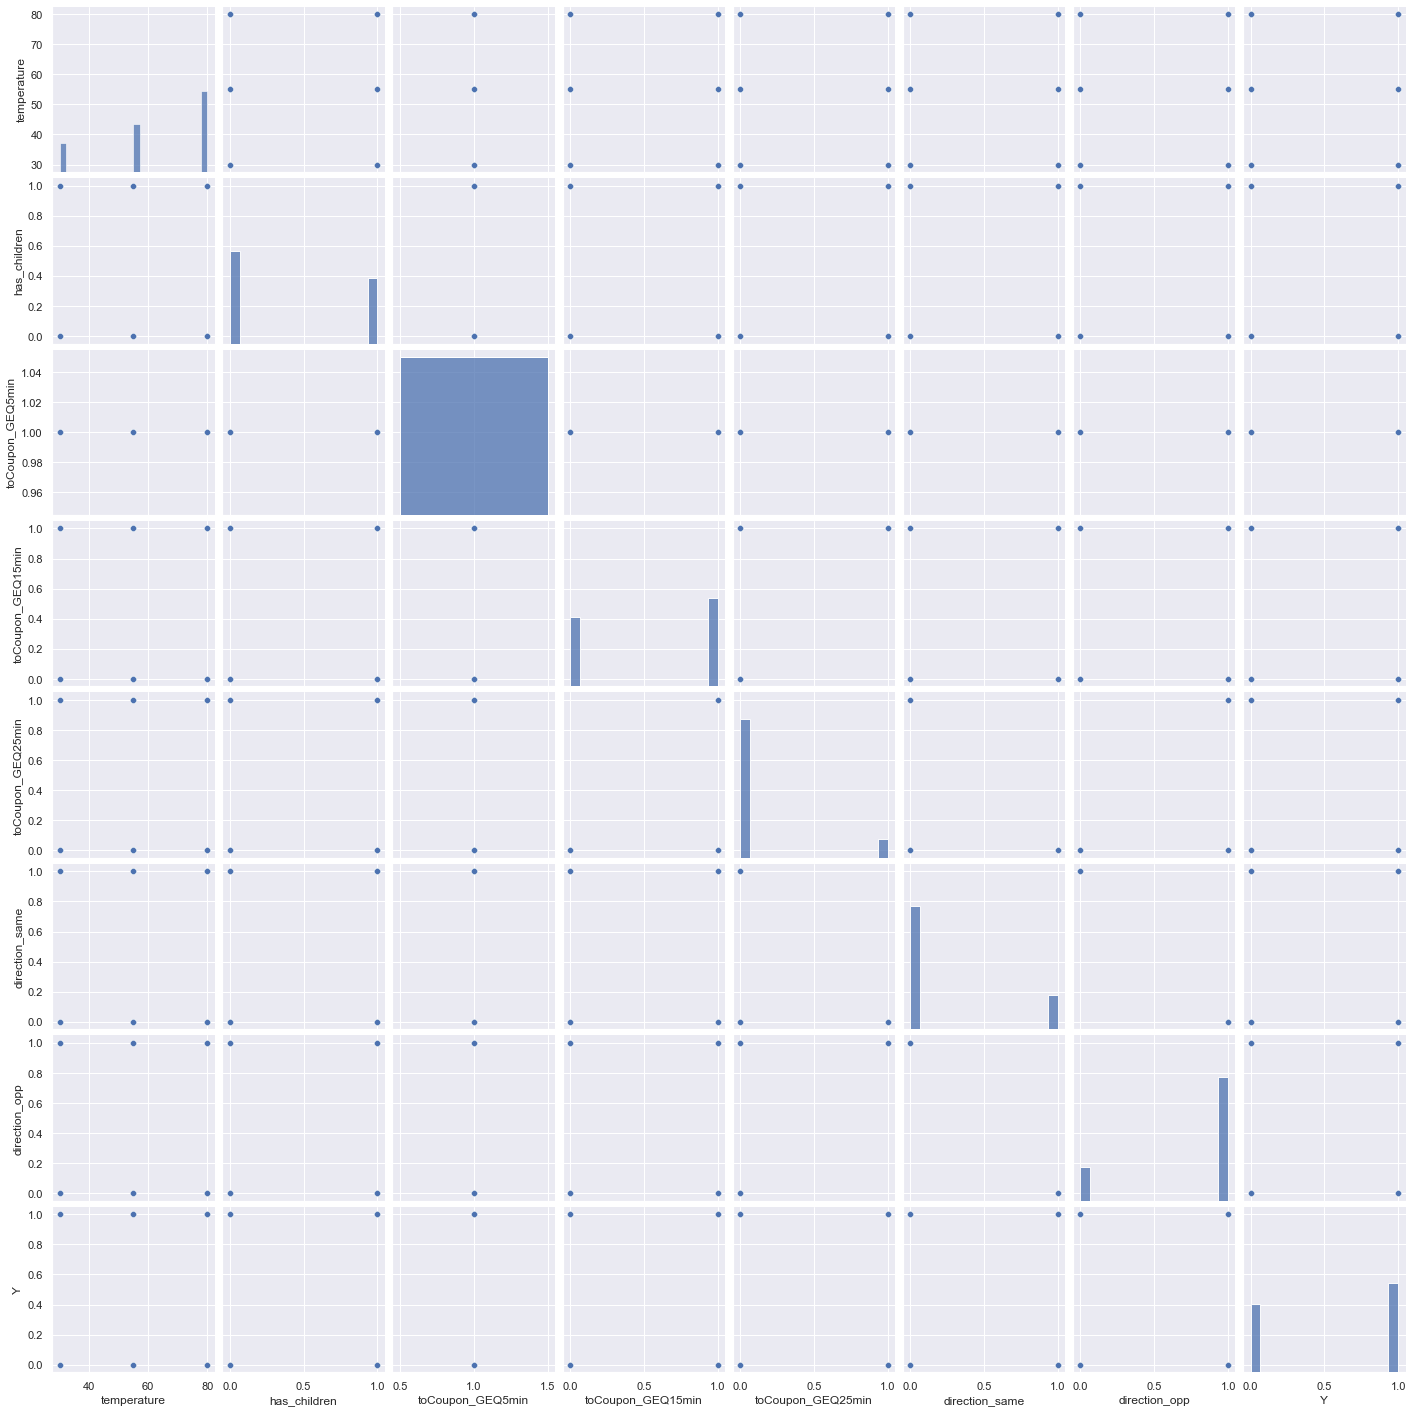

In [214]:
sns.pairplot(data)
# Plotting the data does not seem to reveal very much.

<AxesSubplot:xlabel='passanger', ylabel='Count'>

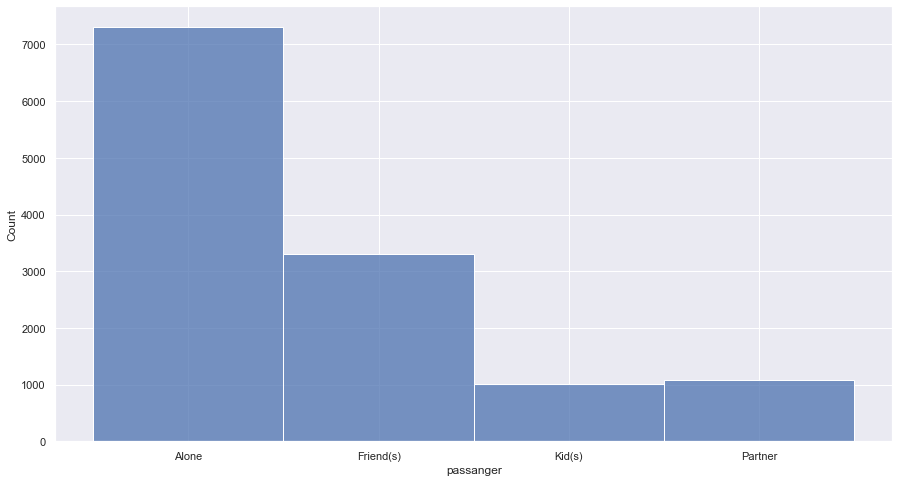

In [217]:
sns.histplot(data=data, x='passanger')

<AxesSubplot:xlabel='maritalStatus', ylabel='Count'>

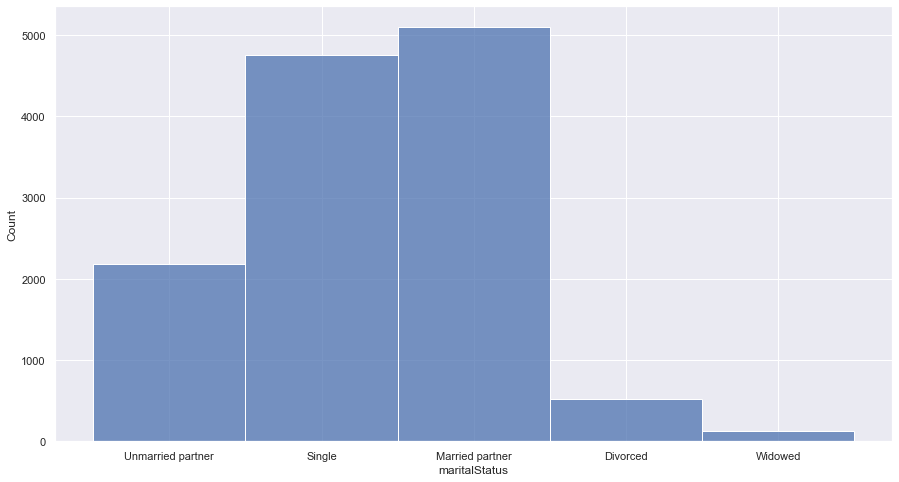

In [221]:
sns.histplot(data=data, x='maritalStatus')

<AxesSubplot:xlabel='age', ylabel='Count'>

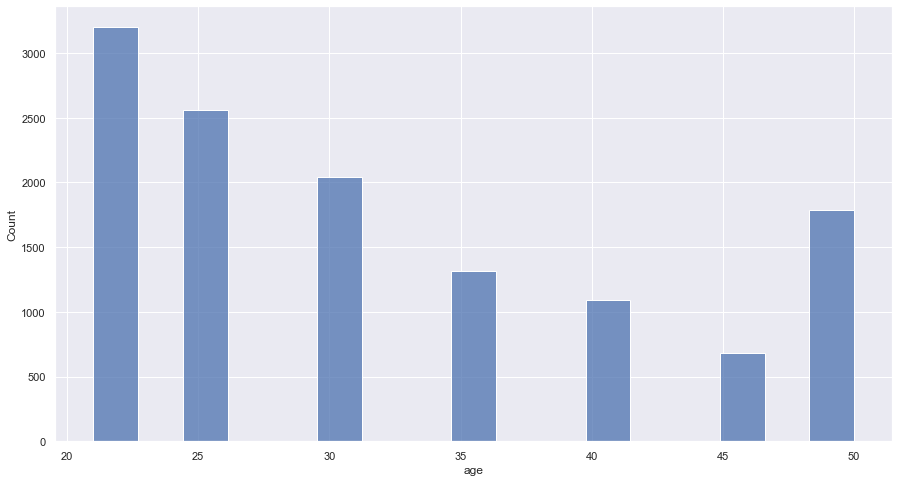

In [243]:
data.loc[data['age']=='50plus'] = 50
data.loc[data['age']=='below21'] = 21
pd.to_numeric(data['age'])
sns.histplot(data=data, x='age')
# Most survey respondents were young